In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, lil_matrix,identity
import seaborn

In [0]:
def is_house(x, y):
    boxes = [(69,111),(69,264),(138,12),(138,165),(192,111),(192,264),(261,12),(261,165)]
    L_houses = [(69,12),(69,165), (192,12),(192,165)]
    I_houses = [(138,51),(138,204),(261,51),(261,204)]
    for box in boxes:
        if x > box[0] and x < box[0] + 18 and y > box[1] and y < box[1] + 18:
            return True
    for I in I_houses:
        if (x > I[0] and x < I[0] + 18 and y > I[1] and y < I[1] + 78) or (x > I[0] - 12 and x < I[0] + 1 and y > I[1] + 60 and y < I[1] + 78):
            return True
    for L in L_houses:
        if (x > L[0] and x < L[0] + 18 and y > L[1] and y < L[1] + 78) or (x > L[0] + 12 and x < L[0] + 24 and y > L[1] and y < L[1] + 18):
            return True
    return False

def is_edge(x, y):
    return x > 299 or y > 299 or y == 0

In [0]:
def solve(M=300, eps=1e-5, steps=50000):   
    k = 0.5
    lambda1 = 1.0
    lambda2 = 0
    h = 1/M
    N = M * M
    tau = (h**2)/(4*k)

    coefficients = [tau*(k/(h**2)-lambda1/(2*h)), tau*(k/(h**2)+lambda1/(2*h)),
                    tau*(k/(h**2)-lambda2/(2*h)), tau*(k/(h**2)+lambda2/(2*h))]
    u = np.zeros((N, 1))
    for i in range(M):
        u[M * i, 0]=1
    
    A = lil_matrix((N, N))
    b = np.zeros(N)
    dx = [1, -1, 0, 0]
    dy = [0, 0, 1, -1]

    for column in range(M):
        for row in range(M):
            i = column * M + row
            A[i, i] = 1-4*(tau*k)/(h**2)
            for j in range(0, len(coefficients)):
                x = column + dx[j]
                y = row + dy[j]
                if x <= 0:
                    b[i] += coefficients[j]
                elif is_house(x, y) or is_edge(x, y):
                    A[i, i] += coefficients[j]
                else:
                    A[i, x * M + y] = coefficients[j]

    A = csr_matrix(A)
    b = b.reshape(N, -1)
    for i in range(steps):
        u_new = A @ u + b
        error = np.max(np.abs(u_new - u))
        if error < eps:
            break
        u = u_new
    print(f'iterations: {i+1}, error: {error}')
    return u.reshape((M,M)).T[::-1]

iterations: 3916, error: 9.999775574809355e-05
CPU times: user 6.63 s, sys: 230 ms, total: 6.86 s
Wall time: 6.76 s


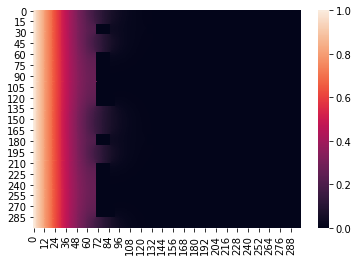

In [4]:
%%time
U = solve(eps=1e-4)
seaborn.heatmap(U)

iterations: 36036, error: 9.999835266005785e-06
CPU times: user 37 s, sys: 1.05 s, total: 38.1 s
Wall time: 38 s


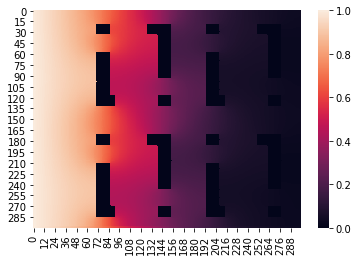

In [5]:
%%time
U = solve(eps=1e-5)
seaborn.heatmap(U)

iterations: 100000, error: 5.369322033377255e-06
CPU times: user 1min 36s, sys: 2.66 s, total: 1min 38s
Wall time: 1min 38s


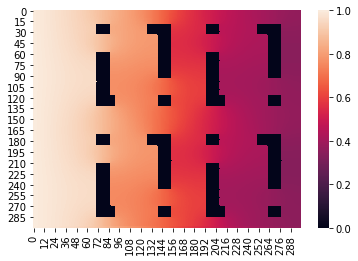

In [6]:
%%time
U = solve(eps=1e-6, steps=100000)
seaborn.heatmap(U)

iterations: 200000, error: 2.463912680550351e-06
CPU times: user 3min 9s, sys: 5.65 s, total: 3min 14s
Wall time: 3min 14s


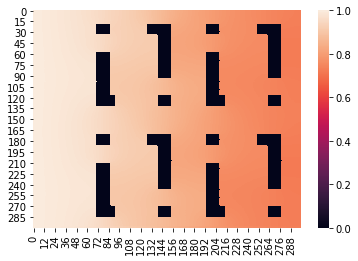

In [7]:
%%time
U = solve(eps=1e-7, steps=200000)
seaborn.heatmap(U)